* Numerical Data 
     * Univariante Imputation
     * Multivariant Imputation

## Handling Missing Numeric Data

#####  Mean/Median

    * Easy to recreate (at server) but generally avoid at production step.
    
    * Chnages distribution shape.
    
    * When data is missing less than 5 %.
    
    * When missing data is at random places.
 
##### Whom to Use When?
normal distribution -- mean

skewed distribution -- median


 * Variance Shrinks
 
 * Change in distribution (same -- agreed)
 
 * Covairnace 
 
 * BoxPlot to see otlier

In [64]:
import pandas as pd
df=pd.read_csv("ttrain.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [65]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
df=df.drop(['PassengerId','Pclass','Name','Sex','SibSp','Cabin','Parch','Ticket','Fare'],axis=1)

In [79]:
df

,Survived,Age,Embarked
0,0,22.0,S
1,1,38.0,C
2,1,26.0,S
3,1,35.0,S
4,0,35.0,S
...,...,...,...
886,0,27.0,S
887,1,19.0,S
888,0,NaN,S
889,1,26.0,C


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,x_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.3,random_state=42)

In [83]:
X_train

,Age,Embarked
445,4.0,S
650,NaN,S
172,1.0,S
450,36.0,S
314,43.0,S
...,...,...
106,21.0,S
270,NaN,S
860,41.0,S
435,14.0,S


In [84]:
mean_age=X_train['Age'].mean()

In [85]:
mean_age

29.256352705410823

In [88]:
median_age=X_train['Age'].median()

In [89]:
median_age

28.0

In [90]:
now lets fill this value in place of missing value

SyntaxError: invalid syntax (659360038.py, line 1)

In [92]:
X_train['age_median']=X_train['Age'].fillna(median_age)

In [94]:
X_train['age_mean']=X_train['Age'].fillna(mean_age)

### now ot time to calculate variance -- it will shrink

In [101]:
X_train['Age'].var(),X_train['age_mean'].var(),X_train['age_median'].var()

(211.9518806464334, 169.69780797736954, 169.94984651902163)

### lets check corrvariance

In [120]:
X_train.cov()

,Age,age_median,age_mean
Age,211.951881,211.951881,211.951881
age_median,211.951881,169.949847,169.697808
age_mean,211.951881,169.697808,169.697808


In [121]:
X_train.corr()

,Age,age_median,age_mean
Age,1.0,1.000000,1.000000
age_median,1.0,1.000000,0.999258
age_mean,1.0,0.999258,1.000000


In [103]:
import matplotlib.pyplot as plt

### change in Distribution

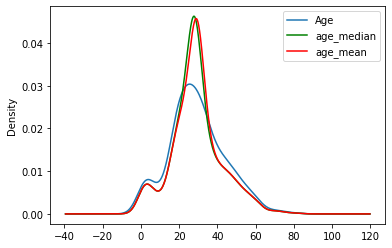

In [118]:
fig=plt.figure()
ax=fig.add_subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['age_median'].plot(kind='kde',ax=ax,color='green')

X_train['age_mean'].plot(kind='kde',ax=ax,color='red')


# adding Legends

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


not good

### BOXPLOT

<AxesSubplot:>

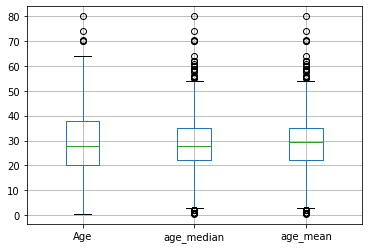

In [124]:
X_train[['Age','age_median','age_mean']].boxplot()

not good 

# Using Sklearn

In [134]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [135]:
imputer=SimpleImputer(strategy='mean')

In [136]:
imputer2=SimpleImputer(strategy='median')

In [137]:
trf=ColumnTransformer(
[
    ('imputer',imputer,['Age']),
],remainder="passthrough")

In [140]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer', SimpleImputer(), ['Age'])])

In [141]:
trf.named_transformers_['imputer'].statistics_

array([29.25635271])

In [142]:
X_train=trf.fit_transform(X_train)

In [143]:
X_train

array([[4.0, 'S', 4.0, 4.0],
       [29.256352705410823, 'S', 28.0, 29.256352705410823],
       [1.0, 'S', 1.0, 1.0],
       ...,
       [41.0, 'S', 41.0, 41.0],
       [14.0, 'S', 14.0, 14.0],
       [21.0, 'S', 21.0, 21.0]], dtype=object)


# Arbitary Value Imputation 

--> When data is not missing at random 
--> fill missing value with some value which is not in data
* easy to implement
* PDF distort
* Cov changes

In [145]:
df=pd.read_csv("ttrain.csv")

In [146]:
df=df.drop(['PassengerId','Pclass','Name','Sex','SibSp','Cabin','Parch','Ticket','Fare'],axis=1)

In [147]:
df

,Survived,Age,Embarked
0,0,22.0,S
1,1,38.0,C
2,1,26.0,S
3,1,35.0,S
4,0,35.0,S
...,...,...,...
886,0,27.0,S
887,1,19.0,S
888,0,NaN,S
889,1,26.0,C


In [148]:
X_train,x_test,y_train,y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.3,random_state=42)

In [149]:
X_train

,Age,Embarked
445,4.0,S
650,NaN,S
172,1.0,S
450,36.0,S
314,43.0,S
...,...,...
106,21.0,S
270,NaN,S
860,41.0,S
435,14.0,S


In [150]:
X_train['median']=X_train['Age'].fillna(99)

In [151]:
X_train

,Age,Embarked,median
445,4.0,S,4.0
650,NaN,S,99.0
172,1.0,S,1.0
450,36.0,S,36.0
314,43.0,S,43.0
...,...,...,...
106,21.0,S,21.0
270,NaN,S,99.0
860,41.0,S,41.0
435,14.0,S,14.0


<AxesSubplot:ylabel='Density'>

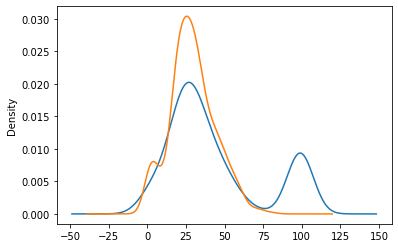

In [162]:
fig=plt.figure()

ax=fig.add_subplot(111)

X_train['median'].plot(kind='kde',ax=ax)
X_train['Age'].plot(kind='kde',ax=ax)

# End of Distribution Imputation

Normally Distributed -- 

fill with this value :

* (mean+3* variance)
* (mean-3*variance)

Skewed Distribution  -- IQR Proximity Rule 
* Q1 - 1.5 IQR (IQR= Q3-Q1)
* Q3 + 1.5 IQR

In [166]:
df

,Survived,Age,Embarked
0,0,22.0,S
1,1,38.0,C
2,1,26.0,S
3,1,35.0,S
4,0,35.0,S
...,...,...,...
886,0,27.0,S
887,1,19.0,S
888,0,NaN,S
889,1,26.0,C
